In [32]:
import pandas as pd

data = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [33]:
data["Quantity"] = data["Quantity"].map(lambda x: x if x > 0 else x*-1)
data["Price"] = data["Price"].map(lambda x: x if x > 0 else x*-1)
data[data["Price"] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [34]:
data["Hour"] = data["InvoiceDate"].dt.hour
data["Month"] = data["InvoiceDate"].dt.month
data["Day"] = data["InvoiceDate"].dt.day
data["Year"] = data["InvoiceDate"].dt.year
data[data["Year"] != 2010]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Hour,Month,Day,Year
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,10,1,4,2011
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10,1,4,2011
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10,1,4,2011
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10,1,4,2011
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,10,1,4,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12,9,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,12,9,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,12,9,2011
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,12,12,9,2011


In [35]:
print(data)
data["StockCode"].unique()

       Invoice StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  Hour  Month  \
0      2010-12-01 08

array(['85123A', 71053, '84406B', ..., '90214U', '47591b', 23843],
      dtype=object)

In [36]:
price_per_product = data.groupby("StockCode")["Price"].mean()
cuantity_per_product = data.groupby("StockCode")["Quantity"].sum()

index = price_per_product.index

products = pd.DataFrame(index=index, columns=["Price", "Cuantity"])
products["Price"] = price_per_product
products["Cuantity"] = cuantity_per_product
products

,Price,Cuantity
StockCode,,
10002,1.056849,1043
10080,0.376667,495
10120,0.210000,193
10125,0.859681,1296
10133,0.645800,2959
...,...,...
gift_0001_20,15.038000,20
gift_0001_30,21.941250,37
gift_0001_40,33.566667,3


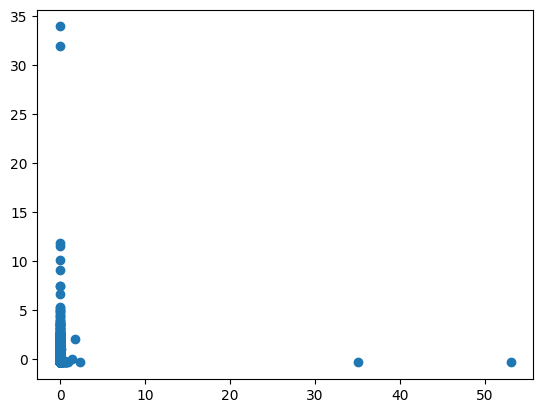

In [37]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
products_scaled = scaler.fit_transform(products)

plt.scatter(products_scaled[:, 0], products_scaled[:, 1])

In [38]:
print(f'Mean of Price : {products["Price"].mean()},  Standar Desviation of Price : {products["Price"].std()}')
print(f'Mean of Cuantity : {products["Cuantity"].mean()},  Standar Desviation of Cuantity : {products["Cuantity"].std()}')

Mean of Price : 8.554688073979506,  Standar Desviation of Price : 208.26303214665523
Mean of Cuantity : 1509.954054054054,  Standar Desviation of Cuantity : 4727.040554889647


In [39]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(products['Price']))

outliers_price = products['Price'][z_scores > 3]
outliers_price

StockCode
AMAZONFEE     7324.784706
B            11062.060000
Name: Price, dtype: float64

In [40]:
z_scores = np.abs(stats.zscore(products['Cuantity']))

outliers_cuantity = products['Cuantity'][z_scores > 3]
outliers_cuantity

StockCode
15036      25100
17003      23059
20713      17489
20724      17994
20725      20127
21212      36799
21915      22200
21977      24955
22086      19808
22151      16040
22178      24754
22197      57392
22355      18303
22386      21921
22469      18167
22492      26829
22616      26363
22693      16316
22952      16391
22961      16743
23005      23984
23084      32798
23166     152527
23203      21193
23843     161990
47566      18576
84077      56247
84347      18852
84755      16518
84879      36701
84946      19581
84991      18388
85099B     49593
85099F     18719
85123A     44498
Name: Cuantity, dtype: int64

In [41]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.03)  # 3% de los datos como outliers
products['Outlier Prices'] = model.fit_predict(products[['Price']])

# Filtrar los outliers
outliers_price = products[products['Outlier Prices'] == -1]

print("Outliers detectados:")
print(outliers_price)

Outliers detectados:
                  Price  Cuantity  Outlier Prices
StockCode                                        
20785         32.625000        16              -1
21258         16.226973       632              -1
21275         16.766471        56              -1
21277         22.230417        28              -1
21310         29.950000         1              -1
...                 ...       ...             ...
S             50.404603        63              -1
gift_0001_20  15.038000        20              -1
gift_0001_30  21.941250        37              -1
gift_0001_40  33.566667         3              -1
gift_0001_50  41.890000         4              -1

[123 rows x 3 columns]


In [42]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.03)  # 1% de los datos como outliers
products['Outlier Cuantity'] = model.fit_predict(products[['Cuantity']])

# Filtrar los outliers
outliers_cuantity = products[products['Outlier Cuantity'] == -1]

print("Outliers detectados:")
print(outliers_cuantity)

Outliers detectados:
                Price  Cuantity  Outlier Prices  Outlier Cuantity
StockCode                                                        
15036        1.063416     25100               1                -1
16014        0.401481     13328               1                -1
16045        0.042254     13467               1                -1
17003        1.063959     23059               1                -1
18007        0.266250      8718               1                -1
...               ...       ...             ...               ...
85099B       2.470264     49593               1                -1
85099C       2.593406     14203               1                -1
85099F       2.357530     18719               1                -1
85123A       3.103238     44498               1                -1
M          375.566392     11296              -1                -1

[121 rows x 4 columns]


In [43]:
products = products[products["Outlier Prices"] != -1]
products = products[products["Outlier Cuantity"] != -1]
products.drop(["Outlier Prices", "Outlier Cuantity"], axis=1, inplace=True)
products

,Price,Cuantity
StockCode,,
10002,1.056849,1043
10080,0.376667,495
10120,0.210000,193
10125,0.859681,1296
10133,0.645800,2959
...,...,...
DCGSSBOY,3.104545,47
DCGSSGIRL,3.133077,47
PADS,0.000750,4


In [44]:
print(f'Mean of Price : {products["Price"].mean()},  Standar Desviation of Price : {products["Price"].std()}')
print(f'Mean of Cuantity : {products["Cuantity"].mean()},  Standar Desviation of Cuantity : {products["Cuantity"].std()}')

Mean of Price : 3.0058396463116406,  Standar Desviation of Price : 2.6617705468525434
Mean of Cuantity : 1037.4532392894462,  Standar Desviation of Cuantity : 1557.5308342424055


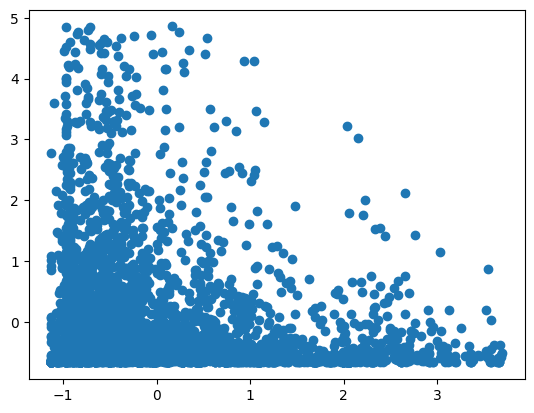

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
products_scaled = scaler.fit_transform(products)

plt.scatter(products_scaled[:, 0], products_scaled[:, 1])

In [46]:
popularity_in_month = data.groupby(["StockCode", "Month"]).count()["Invoice"].unstack().fillna(0)
popularity_in_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
StockCode,,,,,,,,,,,,
10002,21.0,7.0,9.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
10080,0.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,3.0,7.0,0.0
10120,0.0,1.0,5.0,0.0,2.0,0.0,1.0,2.0,4.0,2.0,8.0,5.0
10125,28.0,0.0,12.0,6.0,6.0,3.0,11.0,4.0,4.0,5.0,2.0,13.0
10133,21.0,6.0,7.0,3.0,4.0,42.0,54.0,38.0,9.0,0.0,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
gift_0001_20,2.0,1.0,0.0,2.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0
gift_0001_30,1.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
gift_0001_40,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [47]:
popularity_in_month["Most Popular Month"] = popularity_in_month.idxmax(axis=1)
popularity_in_month

Month,1,2,3,4,5,6,7,8,9,10,11,12,Most Popular Month
StockCode,,,,,,,,,,,,,
10002,21.0,7.0,9.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,12
10080,0.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,3.0,7.0,0.0,11
10120,0.0,1.0,5.0,0.0,2.0,0.0,1.0,2.0,4.0,2.0,8.0,5.0,11
10125,28.0,0.0,12.0,6.0,6.0,3.0,11.0,4.0,4.0,5.0,2.0,13.0,1
10133,21.0,6.0,7.0,3.0,4.0,42.0,54.0,38.0,9.0,0.0,1.0,15.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
gift_0001_20,2.0,1.0,0.0,2.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,6
gift_0001_30,1.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,8
gift_0001_40,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4


ANALIZING DATA BY MOST POPULAR MONTH

In [48]:
products["Most Popular Month"] = popularity_in_month["Most Popular Month"]
products.sort_values(by="Most Popular Month")

,Price,Cuantity,Most Popular Month
StockCode,,,
84415B,1.750000,17,1
22766,3.201501,3350,1
22767,10.249532,809,1
85031C,2.475000,4,1
22778,4.707619,884,1
...,...,...,...
22845,7.798410,817,12
22844,10.767389,1034,12
22840,8.336644,936,12


In [49]:
scaler = StandardScaler()
products_scaled = scaler.fit_transform(products)

Text(0, 0.5, 'Cuantity')

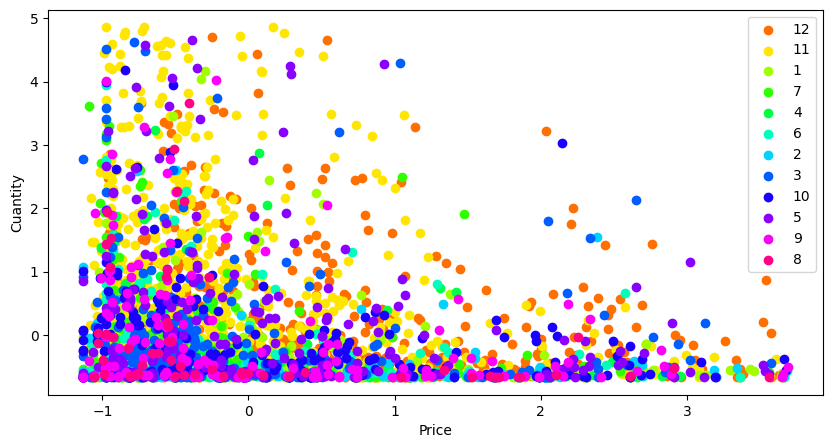

In [50]:
#create a palette with 12 colors for each month
import seaborn as sns

palette = sns.color_palette("hsv", 12)
#represent using a scatter plot the products with the most popular month
plt.figure(figsize=(10, 5))
for i, month in enumerate(products["Most Popular Month"].unique()):
    plt.scatter(products_scaled[products["Most Popular Month"] == month, 0], products_scaled[products["Most Popular Month"] == month, 1], color=palette[i], label=month)
plt.legend()
plt.xlabel("Price")
plt.ylabel("Cuantity")

Centroides de los Clusters:
 [[-0.45786456  2.24014795  0.39758724]
 [ 0.18660173 -0.2652317   0.78722199]
 [-0.088965   -0.36290204 -1.09246962]]
Centroides de los Clusters:
 [[-0.42678612  2.55345009  0.37039269]
 [-0.2764805  -0.16053345  0.80343679]
 [-0.38313361 -0.34254118 -1.08861065]
 [ 2.00300001 -0.39552001  0.10909123]]
Centroides de los Clusters:
 [[-0.42043319  2.57464036  0.37247208]
 [-0.34219693 -0.14718357  0.80067164]
 [-0.47096689 -0.32992989 -1.0675552 ]
 [ 1.73437666 -0.36281732  0.81785721]
 [ 1.70192032 -0.44346341 -1.07624923]]
Centroides de los Clusters:
 [[-0.39967686  3.11959325  0.24650351]
 [-0.20925157 -0.42133607  0.7812481 ]
 [-0.49029338 -0.35649689 -1.12144689]
 [ 1.88864441 -0.35025303  0.802368  ]
 [ 1.69343962 -0.44178031 -1.08780674]
 [-0.53013629  0.87579983  0.63140192]]


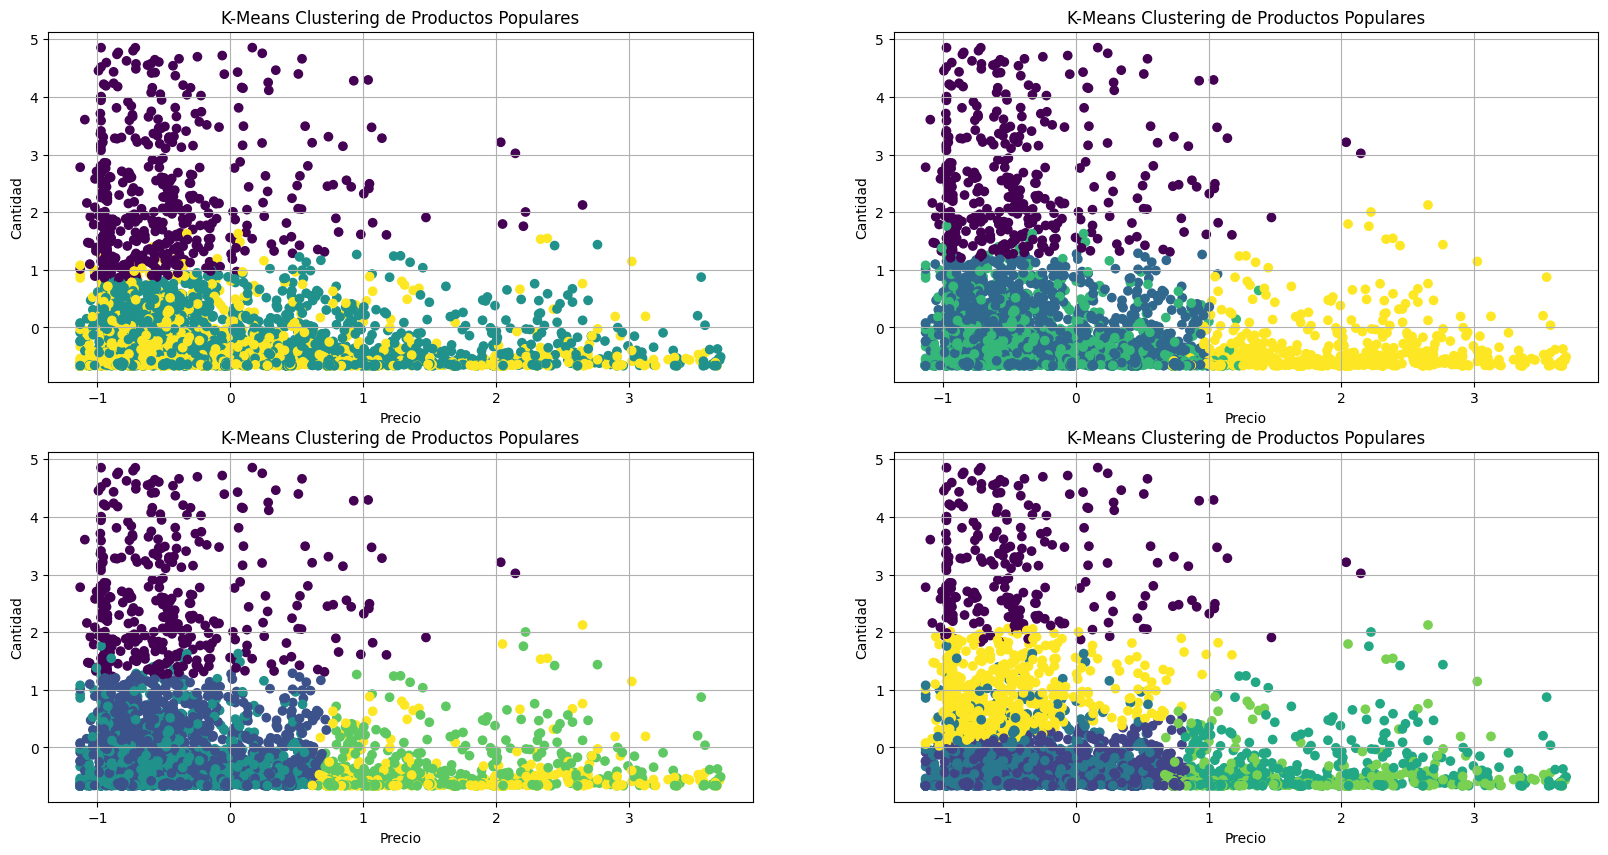

In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters_k3 = kmeans.fit_predict(products_scaled)

# Visualizar los resultados
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.scatter(products_scaled[:, 0], products_scaled[:, 1], c=clusters_k3, cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.title('K-Means Clustering de Productos Populares')
plt.grid(True)

print("Centroides de los Clusters:\n", kmeans.cluster_centers_)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters_k4 = kmeans.fit_predict(products_scaled)

plt.subplot(2, 2, 2)
plt.scatter(products_scaled[:, 0], products_scaled[:, 1], c=clusters_k4, cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.title('K-Means Clustering de Productos Populares')
plt.grid(True)

print("Centroides de los Clusters:\n", kmeans.cluster_centers_)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters_k5 = kmeans.fit_predict(products_scaled)

plt.subplot(2, 2, 3)
plt.scatter(products_scaled[:, 0], products_scaled[:, 1], c=clusters_k5, cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.title('K-Means Clustering de Productos Populares')
plt.grid(True)

print("Centroides de los Clusters:\n", kmeans.cluster_centers_)

kmeans = KMeans(n_clusters=6, random_state=42)
clusters_k6 = kmeans.fit_predict(products_scaled)

print("Centroides de los Clusters:\n", kmeans.cluster_centers_)

plt.subplot(2, 2, 4)
plt.scatter(products_scaled[:, 0], products_scaled[:, 1], c=clusters_k6, cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.title('K-Means Clustering de Productos Populares')
plt.grid(True)
plt.show()

In [52]:
products_clustered = products.copy()

products_clustered["Cluster_3"] = clusters_k3
products_clustered["Cluster_4"] = clusters_k4
products_clustered["Cluster_5"] = clusters_k5
products_clustered["Cluster_6"] = clusters_k6

products_clustered

,Price,Cuantity,Most Popular Month,Cluster_3,Cluster_4,Cluster_5,Cluster_6
StockCode,,,,,,,
10002,1.056849,1043,12,1,1,1,1
10080,0.376667,495,11,1,1,1,1
10120,0.210000,193,11,1,1,1,1
10125,0.859681,1296,1,2,2,2,2
10133,0.645800,2959,7,0,0,0,5
...,...,...,...,...,...,...,...
DCGSSBOY,3.104545,47,3,2,2,2,2
DCGSSGIRL,3.133077,47,3,2,2,2,2
PADS,0.000750,4,9,1,1,1,1


CHARACTERISTICS OF CLUSTERS WITH K=3

In [53]:
print(f"Most Popular Month of Products which belong to Cluster 0 = ", products_clustered[products_clustered["Cluster_3"] == 0]["Most Popular Month"].unique())
print(f"Most Popular Month of Products which belong to Cluster 1 = ", products_clustered[products_clustered["Cluster_3"] == 1]["Most Popular Month"].unique())
print(f"Most Popular Month of Products which belong to Cluster 2 = ", products_clustered[products_clustered["Cluster_3"] == 2]["Most Popular Month"].unique())

Most Popular Month of Products which belong to Cluster 0 =  [ 7 11 10  3 12  5  6  4  9  8  2  1]
Most Popular Month of Products which belong to Cluster 1 =  [12 11 10  9  8  7  6]
Most Popular Month of Products which belong to Cluster 2 =  [1 4 7 6 2 3 5]


In [54]:
month_cluster = {}

for i in range(1, 13):
    cluster_apparences = []
    month_selection = products_clustered[products_clustered["Most Popular Month"] == i]
    for j in range(3):
        cluster_apparences.append(month_selection[month_selection["Cluster_3"] == j].shape[0])
    month_cluster[i] = cluster_apparences

month_cluster

{1: [8, 0, 429],
 2: [2, 0, 118],
 3: [21, 0, 289],
 4: [10, 0, 183],
 5: [36, 0, 190],
 6: [14, 5, 104],
 7: [21, 38, 193],
 8: [11, 45, 0],
 9: [24, 120, 0],
 10: [18, 201, 0],
 11: [217, 683, 0],
 12: [82, 766, 0]}

In [55]:
products_clustered.groupby(["Most Popular Month", "Cluster_3"]).count()["Price"].unstack().fillna(0)

Cluster_3,0,1,2
Most Popular Month,,,
1,8.0,0.0,429.0
2,2.0,0.0,118.0
3,21.0,0.0,289.0
4,10.0,0.0,183.0
5,36.0,0.0,190.0
6,14.0,5.0,104.0
7,21.0,38.0,193.0
8,11.0,45.0,0.0
9,24.0,120.0,0.0


In [56]:
stats_price_month_k3 = products_clustered.groupby(["Most Popular Month", "Cluster_3"]).mean()["Price"].unstack().fillna(0)
stats_cuantity_month_k3 = products_clustered.groupby(["Most Popular Month", "Cluster_3"]).mean()["Cuantity"].unstack().fillna(0)
stats_cuantity_month_k3.rename(columns={0: "Cluster 0 Cuantity Mean", 1: "CLuster 1 Cuantity Mean", 2: "Cluster 2 Cuantity Mean"}, inplace=True)
stats_price_month_k3.rename(columns={0: "Cluster 0 Price Mean", 1: "CLuster 1 Price Mean", 2: "Cluster 2 Price Mean"}, inplace=True)

stats_month_k3 = pd.concat([stats_price_month_k3, stats_cuantity_month_k3], axis=1)
stats_month_k3.replace(0, np.nan, inplace=True)
#I want to add a new line in my dataframe with the mean of each column
stats_month_k3.loc["Year"] = stats_month_k3.mean()
stats_month_k3

Cluster_3,Cluster 0 Price Mean,CLuster 1 Price Mean,Cluster 2 Price Mean,Cluster 0 Cuantity Mean,CLuster 1 Cuantity Mean,Cluster 2 Cuantity Mean
Most Popular Month,,,,,,
1,2.504460,NaN,2.757157,5403.375000,NaN,424.188811
2,1.330120,NaN,3.824392,5077.500000,NaN,263.440678
3,2.182186,NaN,2.708765,5528.857143,NaN,614.266436
4,1.399500,NaN,2.312900,4080.900000,NaN,259.846995
5,1.923812,NaN,3.715381,5123.305556,NaN,699.000000
6,1.247471,10.632789,2.823886,3874.071429,624.000000,502.730769
7,1.497503,6.612711,1.703379,4262.857143,175.184211,458.015544
8,1.297112,3.516750,NaN,3844.727273,323.555556,NaN
9,1.374827,3.751860,NaN,3889.000000,475.225000,NaN


CHARACTERISTICS OF CLUSTERS WITH K=4

In [57]:
print(f"Most Popular Month of Products which belong to Cluster 0 = ", products_clustered[products_clustered["Cluster_4"] == 0]["Most Popular Month"].unique())
print(f"Most Popular Month of Products which belong to Cluster 1 = ", products_clustered[products_clustered["Cluster_4"] == 1]["Most Popular Month"].unique())
print(f"Most Popular Month of Products which belong to Cluster 2 = ", products_clustered[products_clustered["Cluster_4"] == 2]["Most Popular Month"].unique())
print(f"Most Popular Month of Products which belong to Cluster 2 = ", products_clustered[products_clustered["Cluster_4"] == 3]["Most Popular Month"].unique())

Most Popular Month of Products which belong to Cluster 0 =  [ 7 11  3 12  5 10  6  4  9  8  2  1]
Most Popular Month of Products which belong to Cluster 1 =  [12 11 10  9  8  7]
Most Popular Month of Products which belong to Cluster 2 =  [1 4 7 6 2 3 5]
Most Popular Month of Products which belong to Cluster 2 =  [12 11  9  3  7  5  4  6  1 10  2  8]


In [58]:
products_clustered.groupby(["Most Popular Month", "Cluster_4"]).count()["Price"].unstack().fillna(0)

Cluster_4,0,1,2,3
Most Popular Month,,,,
1,7.0,0.0,395.0,35.0
2,2.0,0.0,91.0,27.0
3,17.0,0.0,257.0,36.0
4,8.0,0.0,167.0,18.0
5,34.0,0.0,149.0,43.0
6,11.0,0.0,87.0,25.0
7,18.0,8.0,194.0,32.0
8,8.0,35.0,0.0,13.0
9,15.0,98.0,0.0,31.0


In [59]:
stats_price_month_k4 = products_clustered.groupby(["Most Popular Month", "Cluster_4"]).mean()["Price"].unstack().fillna(0)
stats_cuantity_month_k4 = products_clustered.groupby(["Most Popular Month", "Cluster_4"]).mean()["Cuantity"].unstack().fillna(0)
stats_cuantity_month_k4.rename(columns={0: "Cluster 0 Cuantity Mean", 1: "CLuster 1 Cuantity Mean", 2: "Cluster 2 Cuantity Mean", 3: "Cluster 3 Cuantity Mean"}, inplace=True)
stats_price_month_k4.rename(columns={0: "Cluster 0 Price Mean", 1: "CLuster 1 Price Mean", 2: "Cluster 2 Price Mean", 3: "Cluster 3 Price Mean"}, inplace=True)

stats_month_k4 = pd.concat([stats_price_month_k4, stats_cuantity_month_k4], axis=1)
stats_month_k4.replace(0, np.nan, inplace=True)
#I want to add a new line in my dataframe with the mean of each column
stats_month_k4.loc["Year"] = stats_month_k4.mean()
stats_month_k4

Cluster_4,Cluster 0 Price Mean,CLuster 1 Price Mean,Cluster 2 Price Mean,Cluster 3 Price Mean,Cluster 0 Cuantity Mean,CLuster 1 Cuantity Mean,Cluster 2 Cuantity Mean,Cluster 3 Cuantity Mean
Most Popular Month,,,,,,,,
1,2.802471,NaN,2.167717,9.342590,5635.000000,NaN,461.270886,101.628571
2,1.330120,NaN,2.419290,8.560108,5077.500000,NaN,254.010989,295.222222
3,1.453431,NaN,1.866367,9.008179,5959.000000,NaN,662.984436,609.416667
4,1.474151,NaN,1.596862,8.821475,4308.125000,NaN,292.137725,283.833333
5,1.987936,NaN,2.273368,8.578095,5249.264706,NaN,768.510067,564.325581
6,1.438051,NaN,1.809467,7.642818,4225.272727,NaN,624.839080,352.080000
7,1.384834,2.369480,1.765783,7.032433,4560.388889,2070.500000,422.711340,122.406250
8,1.120298,1.571799,NaN,8.349740,4341.125000,588.085714,NaN,118.461538
9,1.668256,2.034373,NaN,8.349245,4693.866667,707.051020,NaN,344.000000


In [65]:
products_and_months = pd.concat([products, popularity_in_month], axis=1)
products_and_months.drop("Most Popular Month", axis=1, inplace=True)
products_and_months.dropna(inplace=True)
products_and_months.rename(columns={1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}, inplace=True)
products_and_months


,Price,Cuantity,January,February,March,April,May,June,July,August,September,October,November,December
StockCode,,,,,,,,,,,,,,
10002,1.056849,1043.0,21.0,7.0,9.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
10080,0.376667,495.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,3.0,7.0,0.0
10120,0.210000,193.0,0.0,1.0,5.0,0.0,2.0,0.0,1.0,2.0,4.0,2.0,8.0,5.0
10125,0.859681,1296.0,28.0,0.0,12.0,6.0,6.0,3.0,11.0,4.0,4.0,5.0,2.0,13.0
10133,0.645800,2959.0,21.0,6.0,7.0,3.0,4.0,42.0,54.0,38.0,9.0,0.0,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DCGSSBOY,3.104545,47.0,0.0,2.0,3.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0
DCGSSGIRL,3.133077,47.0,0.0,1.0,4.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0
PADS,0.000750,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0


Centroides de los Clusters:
 [[ 0.18693732  2.25181414  2.09010032  2.47463873  2.44368428  2.42392899
   2.47481459  2.53969686  2.42899784  2.55048638  2.2873089   1.86550456
   1.67194214  1.97083346]
 [ 0.01370055 -0.44044163 -0.32981155 -0.36642776 -0.36661654 -0.37258838
  -0.3863375  -0.41205854 -0.42254371 -0.43540278 -0.43248202 -0.41168571
  -0.40130522 -0.40409443]
 [-0.0911039   0.67319748  0.39382943  0.39591865  0.40492206  0.42777948
   0.45409351  0.51159607  0.57248202  0.57691678  0.64022987  0.69457801
   0.71706956  0.64362094]]
Centroides de los Clusters:
 [[-0.10176695  1.22266135 -0.19725663 -0.31848445 -0.4033915  -0.4281083
  -0.27094478  0.00905702  0.31006553  0.75244847  1.94433581  2.62685198
   2.75037575  1.5988056 ]
 [ 0.00799555 -0.43733632 -0.34986972 -0.38883077 -0.39116327 -0.39560333
  -0.39825392 -0.41891533 -0.42886274 -0.43294463 -0.42165066 -0.40132003
  -0.38827302 -0.3998025 ]
 [-0.06536305  0.53162477  0.60321175  0.63312426  0.66063199  0.68

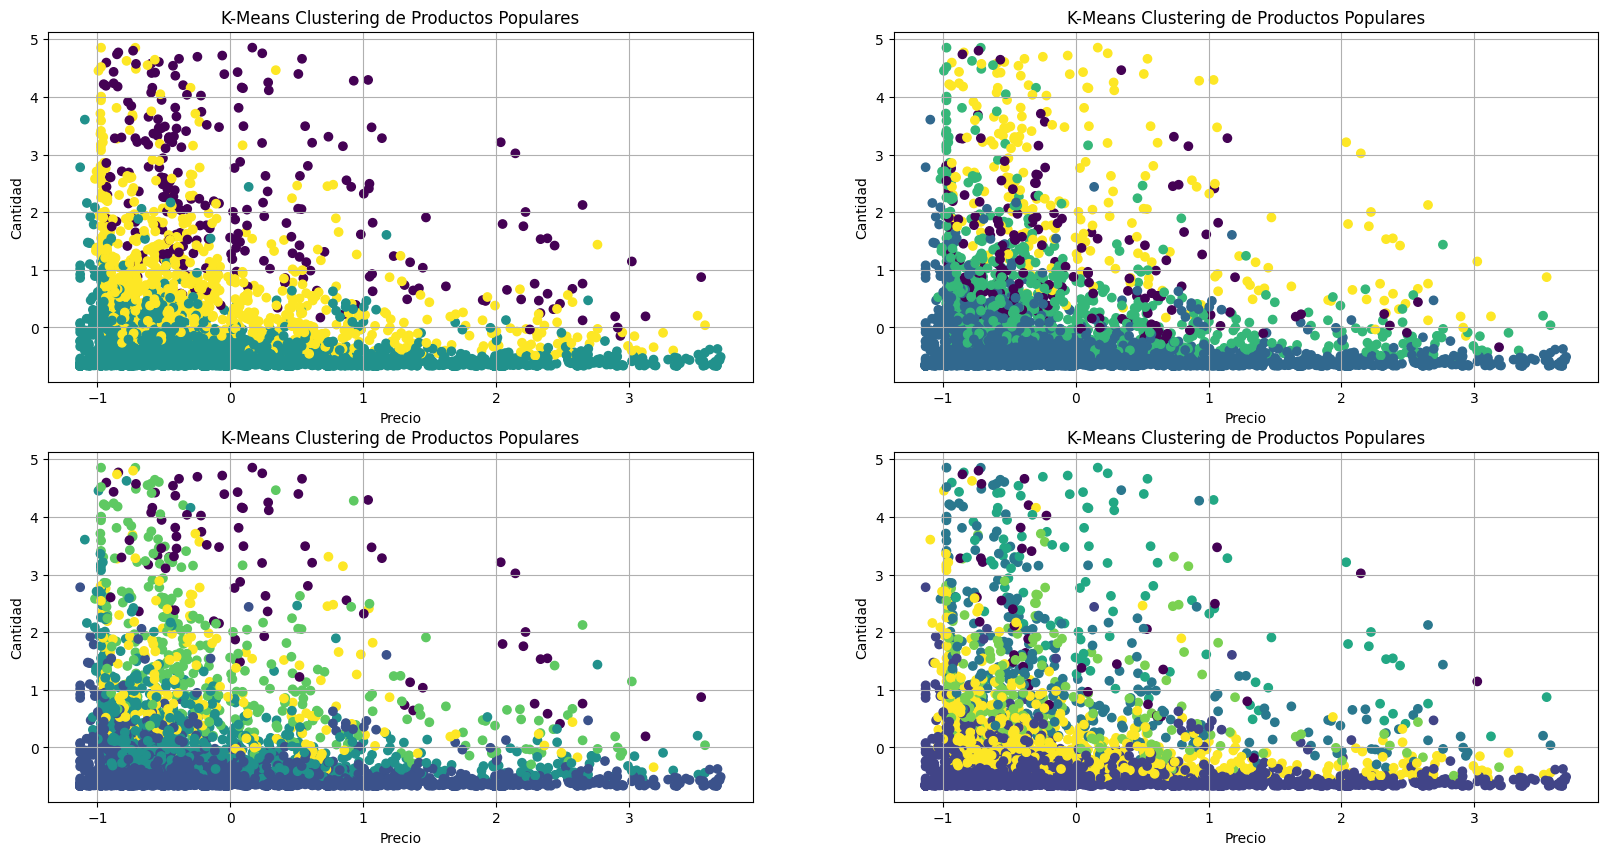

In [67]:
scaler = StandardScaler()
products_and_months_scaled = scaler.fit_transform(products_and_months)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters_k3 = kmeans.fit_predict(products_and_months_scaled)

# Visualizar los resultados
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.scatter(products_and_months_scaled[:, 0], products_and_months_scaled[:, 1], c=clusters_k3, cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.title('K-Means Clustering de Productos Populares')
plt.grid(True)

print("Centroides de los Clusters:\n", kmeans.cluster_centers_)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters_k4 = kmeans.fit_predict(products_and_months_scaled)

plt.subplot(2, 2, 2)
plt.scatter(products_and_months_scaled[:, 0], products_and_months_scaled[:, 1], c=clusters_k4, cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.title('K-Means Clustering de Productos Populares')
plt.grid(True)

print("Centroides de los Clusters:\n", kmeans.cluster_centers_)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters_k5 = kmeans.fit_predict(products_and_months_scaled)

plt.subplot(2, 2, 3)
plt.scatter(products_and_months_scaled[:, 0], products_and_months_scaled[:, 1], c=clusters_k5, cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.title('K-Means Clustering de Productos Populares')
plt.grid(True)

print("Centroides de los Clusters:\n", kmeans.cluster_centers_)

kmeans = KMeans(n_clusters=6, random_state=42)
clusters_k6 = kmeans.fit_predict(products_and_months_scaled)

print("Centroides de los Clusters:\n", kmeans.cluster_centers_)

plt.subplot(2, 2, 4)
plt.scatter(products_and_months_scaled[:, 0], products_and_months_scaled[:, 1], c=clusters_k6, cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.title('K-Means Clustering de Productos Populares')
plt.grid(True)
plt.show()

In [68]:
products_and_months_clustered = products_and_months.copy()

products_and_months_clustered["Cluster_3"] = clusters_k3
products_and_months_clustered["Cluster_4"] = clusters_k4
products_and_months_clustered["Cluster_5"] = clusters_k5
products_and_months_clustered["Cluster_6"] = clusters_k6

products_and_months_clustered

,Price,Cuantity,January,February,March,April,May,June,July,August,September,October,November,December,Cluster_3,Cluster_4,Cluster_5,Cluster_6
StockCode,,,,,,,,,,,,,,,,,,
10002,1.056849,1043.0,21.0,7.0,9.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1,1,1,5
10080,0.376667,495.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,3.0,7.0,0.0,1,1,1,1
10120,0.210000,193.0,0.0,1.0,5.0,0.0,2.0,0.0,1.0,2.0,4.0,2.0,8.0,5.0,1,1,1,1
10125,0.859681,1296.0,28.0,0.0,12.0,6.0,6.0,3.0,11.0,4.0,4.0,5.0,2.0,13.0,1,1,2,5
10133,0.645800,2959.0,21.0,6.0,7.0,3.0,4.0,42.0,54.0,38.0,9.0,0.0,1.0,15.0,2,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DCGSSBOY,3.104545,47.0,0.0,2.0,3.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1,1,1,1
DCGSSGIRL,3.133077,47.0,0.0,1.0,4.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1,1,1,1
PADS,0.000750,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1,1,1,1


In [73]:
stats_cluster_3 = pd.concat([products_and_months_clustered[products_and_months_clustered["Cluster_3"] == 0].mean()[:14], 
                             products_and_months_clustered[products_and_months_clustered["Cluster_3"] == 1].mean()[:14], 
                             products_and_months_clustered[products_and_months_clustered["Cluster_3"] == 2].mean()[:14]], axis=1)

stats_cluster_3.columns = ["Cluster 0", "Cluster 1", "Cluster 2"]

stats_cluster_3

,Cluster 0,Cluster 1,Cluster 2
Price,3.503359,3.042303,2.763374
Cuantity,4544.265060,351.541432,2085.842105
January,32.979920,3.688039,12.447368
February,31.891566,1.995501,10.017544
March,40.574297,2.776528,13.153509
April,32.710843,2.159730,10.903509
May,41.124498,2.057368,13.532895
June,39.819277,2.190101,13.964912
July,39.240964,2.731909,15.471491
August,37.975904,1.905887,14.134868


In [74]:
stats_cluster_4 = pd.concat([products_and_months_clustered[products_and_months_clustered["Cluster_4"] == 0].mean()[:14], 
                             products_and_months_clustered[products_and_months_clustered["Cluster_4"] == 1].mean()[:14], 
                             products_and_months_clustered[products_and_months_clustered["Cluster_4"] == 2].mean()[:14], 
                             products_and_months_clustered[products_and_months_clustered["Cluster_4"] == 3].mean()[:14]], axis=1)

stats_cluster_4.columns = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]

stats_cluster_4

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Price,2.734995,3.027119,2.831881,3.566206
Cuantity,2941.537234,356.377416,1865.367056,4520.365217
January,5.292553,3.445244,14.981842,33.747826
February,2.500000,1.759757,12.513619,33.204348
March,2.281915,2.446381,16.592737,42.721739
April,1.553191,1.908299,13.702983,34.591304
May,3.632979,1.894657,15.916991,43.973913
June,7.558511,2.102690,15.591440,41.308696
July,12.111702,2.651004,16.664073,39.330435
August,16.255319,1.935582,13.747082,37.682609


In [75]:
stats_cluster_5 = pd.concat([products_and_months_clustered[products_and_months_clustered["Cluster_5"] == 0].mean()[:14], 
                             products_and_months_clustered[products_and_months_clustered["Cluster_5"] == 1].mean()[:14], 
                             products_and_months_clustered[products_and_months_clustered["Cluster_5"] == 2].mean()[:14], 
                             products_and_months_clustered[products_and_months_clustered["Cluster_5"] == 3].mean()[:14], 
                             products_and_months_clustered[products_and_months_clustered["Cluster_5"] == 4].mean()[:14]], axis=1)

stats_cluster_5.columns = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

stats_cluster_5

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Price,4.009524,3.093933,2.694559,3.132067,2.663108
Cuantity,5752.951220,279.794590,1374.495261,3374.957831,2730.759804
January,46.024390,2.575655,13.210900,22.391566,4.647059
February,44.670732,1.348690,9.380332,21.701807,2.073529
March,55.036585,1.811919,12.840047,28.611446,1.803922
April,44.414634,1.449704,10.125592,24.009036,1.274510
May,56.317073,1.450127,10.401659,32.036145,2.965686
June,53.219512,1.612426,10.742891,30.027108,6.259804
July,51.853659,2.060862,12.421801,28.123494,10.872549
August,48.792683,1.500845,9.747630,25.951807,14.877451


In [77]:
stats_cluster_6 = pd.concat([products_and_months_clustered[products_and_months_clustered["Cluster_6"] == 0].mean()[:14], 
                             products_and_months_clustered[products_and_months_clustered["Cluster_6"] == 1].mean()[:14], 
                             products_and_months_clustered[products_and_months_clustered["Cluster_6"] == 2].mean()[:14], 
                             products_and_months_clustered[products_and_months_clustered["Cluster_6"] == 3].mean()[:14], 
                             products_and_months_clustered[products_and_months_clustered["Cluster_6"] == 4].mean()[:14],
                             products_and_months_clustered[products_and_months_clustered["Cluster_6"] == 5].mean()[:14]], axis=1)

stats_cluster_6.columns = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]

stats_cluster_6

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Price,3.023724,3.111747,3.099530,3.892794,2.637437,2.669485
Cuantity,4602.275000,258.759565,3158.600639,5236.219048,2521.369159,1301.536215
January,0.250000,2.414348,21.610224,47.676190,4.004673,13.095794
February,0.375000,1.297826,21.313099,44.819048,1.869159,8.904206
March,1.725000,1.729565,28.552716,54.704762,1.761682,12.148364
April,8.575000,1.391739,24.124601,41.333333,1.303738,9.503505
May,42.300000,1.376087,29.194888,48.657143,2.691589,9.800234
June,59.925000,1.544348,25.977636,44.790476,4.504673,10.216121
July,60.975000,1.965652,25.185304,43.476190,7.219626,11.932243
August,57.625000,1.439130,22.638978,42.485714,11.065421,9.228972
